In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("flights_2022_sample_1_5m.csv",
parse_dates=["DEP_TIME","ARR_TIME"])

df.head()

C:\Users\tharu\AppData\Local\Temp\ipykernel_17232\3143970303.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("flights_2022_sample_1_5m.csv",
C:\Users\tharu\AppData\Local\Temp\ipykernel_17232\3143970303.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("flights_2022_sample_1_5m.csv",


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1500000 non-null  object 
 1   AIRLINE                  1500000 non-null  object 
 2   AIRLINE_DOT              1500000 non-null  object 
 3   AIRLINE_CODE             1500000 non-null  object 
 4   DOT_CODE                 1500000 non-null  int64  
 5   FL_NUMBER                1500000 non-null  int64  
 6   ORIGIN                   1500000 non-null  object 
 7   ORIGIN_CITY              1500000 non-null  object 
 8   DEST                     1500000 non-null  object 
 9   DEST_CITY                1500000 non-null  object 
 10  CRS_DEP_TIME             1500000 non-null  int64  
 11  DEP_TIME                 1461094 non-null  object 
 12  DEP_DELAY                1461082 non-null  float64
 13  TAXI_OUT                 1460498 non-null 

In [4]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_CODE          1460326
DELAY_DUE_LATE_AIRCRAFT    1232295
DELAY_DUE_SECURITY         1232295
DELAY_DUE_NAS              1232295
DELAY_DUE_WEATHER          1232295
DELAY_DUE_CARRIER          1232295
AIR_TIME                     43133
ELAPSED_TIME                 43133
ARR_DELAY                    43133
WHEELS_ON                    40052
TAXI_IN                      40052
ARR_TIME                     40051
TAXI_OUT                     39502
WHEELS_OFF                   39502
DEP_DELAY                    38918
DEP_TIME                     38906
CRS_ELAPSED_TIME                 9
ORIGIN_CITY                      0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
DISTANCE                         0
ORIGIN                           0
DEST                             0
DIVERTED                         0
CANCELLED                        0
DEST_CITY                        0
CRS_ARR_TIME        

In [5]:
#   DEFING TARGET COLUMN
#   1 --> Delay

df["DELAYED"] = np.where(df["ARR_DELAY"] > 15,1,0)
df["DELAYED"].value_counts(normalize=True)

DELAYED
0    0.827743
1    0.172257
Name: proportion, dtype: float64

In [6]:
#   Extracting Only Hour 

df['DEP_TIME'] = (df['DEP_TIME'].fillna(0).astype(str).str.replace('.0','',regex=False).str.zfill(4))
df["DEP_HOUR"] = df["DEP_TIME"].str[:2].astype(int)

df.loc[df['DEP_HOUR'] >= 24,'DEP_HOUR'] = np.nan

In [7]:
#   Extracting Only Month

df['FL_DATE'] = pd.to_datetime(df['FL_DATE'],errors='coerce')
df['MONTH'] = df['FL_DATE'].dt.month


In [8]:
#   Extracting Days

df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek

In [9]:
#   Influence of Flight Time on Delaying

df.groupby('DEP_HOUR')['DELAYED'].mean().round(2)*100

DEP_HOUR
0.0      7.0
1.0     59.0
2.0     63.0
3.0     47.0
4.0      5.0
5.0      3.0
6.0      6.0
7.0      9.0
8.0     11.0
9.0     13.0
10.0    13.0
11.0    15.0
12.0    15.0
13.0    17.0
14.0    18.0
15.0    20.0
16.0    21.0
17.0    21.0
18.0    24.0
19.0    25.0
20.0    27.0
21.0    33.0
22.0    32.0
23.0    48.0
Name: DELAYED, dtype: float64

In [10]:
#   Influence of Flight day on Delaying

df.groupby('DAY_OF_WEEK')['DELAYED'].mean().round(2)*100


DAY_OF_WEEK
0    17.0
1    15.0
2    16.0
3    18.0
4    19.0
5    17.0
6    18.0
Name: DELAYED, dtype: float64

In [11]:
#Influence of Flight Month on Delaying

df.groupby('MONTH')['DELAYED'].mean().round(2)*100

MONTH
1     16.0
2     17.0
3     16.0
4     16.0
5     16.0
6     22.0
7     21.0
8     19.0
9     13.0
10    15.0
11    14.0
12    20.0
Name: DELAYED, dtype: float64

In [12]:
#Top 10 airlines that delays most

df.groupby('AIRLINE_CODE')['DELAYED'].mean().sort_values(ascending=False).head(10)

AIRLINE_CODE
B6    0.254783
F9    0.253990
G4    0.241456
NK    0.208555
EV    0.193426
AA    0.187821
UA    0.180886
WN    0.180239
YV    0.174249
AS    0.169794
Name: DELAYED, dtype: float64

In [13]:
#Top 10 airports where delays are often

df.groupby('ORIGIN')['DELAYED'].mean().sort_values(ascending=False).head(10)

ORIGIN
CDB    0.411765
ADK    0.375000
PSM    0.338028
HGR    0.333333
BQN    0.324503
BKG    0.315789
BLV    0.314516
PPG    0.312500
HTS    0.306452
IAG    0.300885
Name: DELAYED, dtype: float64

In [14]:
# Influence of Distance with Delays

df.groupby(pd.cut(df['DISTANCE'],bins=10))['DELAYED'].mean()

C:\Users\tharu\AppData\Local\Temp\ipykernel_17232\4139954537.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['DISTANCE'],bins=10))['DELAYED'].mean()


DISTANCE
(23.217, 607.3]     0.156962
(607.3, 1185.6]     0.185584
(1185.6, 1763.9]    0.187099
(1763.9, 2342.2]    0.180481
(2342.2, 2920.5]    0.183154
(2920.5, 3498.8]    0.161031
(3498.8, 4077.1]    0.148515
(4077.1, 4655.4]    0.180328
(4655.4, 5233.7]    0.226000
(5233.7, 5812.0]    0.000000
Name: DELAYED, dtype: float64

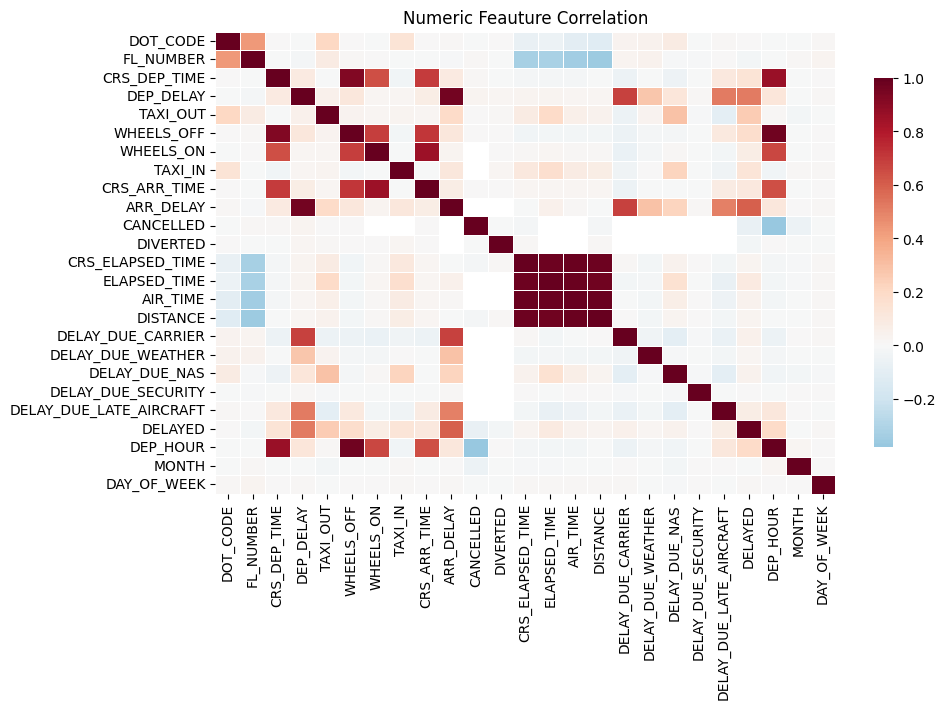

In [15]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(),cmap='RdBu_r',center=0,linewidths=0.5,cbar_kws={'shrink': 0.8})
plt.title("Numeric Feauture Correlation")
plt.show()